### **Régression Logistique**
### **Dataset: Salariés**

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
import io
df = pd.read_csv('Salaries.csv')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Salaire     474 non-null    int64
 1   Education   474 non-null    int64
 2   Minorite    474 non-null    int64
 3   Genre       474 non-null    int64
 4   Anciennete  474 non-null    int64
 5   Cadre       474 non-null    int64
dtypes: int64(6)
memory usage: 22.3 KB


In [126]:
df.head()

,Salaire,Education,Minorite,Genre,Anciennete,Cadre
0,57000,15,0,0,242,1
1,40200,16,0,0,134,0
2,21450,12,0,1,479,0
3,21900,8,0,1,288,0
4,45000,15,0,0,236,0


### **1/ Etude descriptive des données de la table "Salaries"**

**a**/ les indice de position et de dispersion : 

In [127]:
df_describe=df.describe()
df_describe

,Salaire,Education,Minorite,Genre,Anciennete,Cadre
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,34419.567511,13.491561,0.219409,0.455696,176.970464,0.177215
std,17075.661465,2.884846,0.414284,0.498559,105.098862,0.382254
min,15750.000000,8.000000,0.000000,0.000000,65.000000,0.000000
25%,24000.000000,12.000000,0.000000,0.000000,100.000000,0.000000
50%,28875.000000,12.000000,0.000000,0.000000,140.000000,0.000000
75%,36937.500000,15.000000,0.000000,1.000000,221.750000,0.000000
max,135000.000000,21.000000,1.000000,1.000000,554.000000,1.000000


In [128]:
df.Cadre.value_counts()
#la majorité des valeurs de "Cadre" sont des 0

0    390
1     84
Name: Cadre, dtype: int64

b/ Les Histogrammes :

Text(0.5, 1.0, 'Salaire')

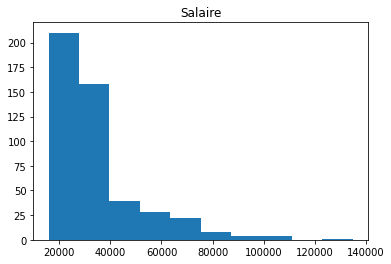

In [129]:
plt.hist(df['Salaire'],bins=10,density=False)
plt.title('Salaire')

Text(0.5, 1.0, 'Education')

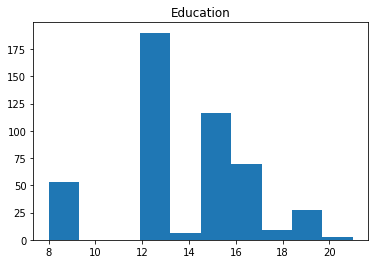

In [130]:
plt.hist(df['Education'],bins=10,density=False)
plt.title('Education')

Text(0.5, 1.0, 'Minorité')

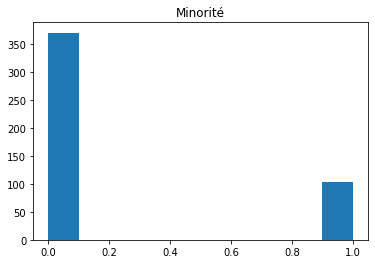

In [131]:
plt.hist(df['Minorite'],density=False,bins=10)
plt.title('Minorité')

Text(0.5, 1.0, 'Genre')

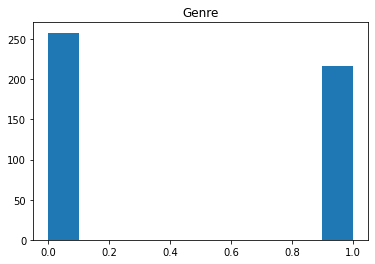

In [132]:
plt.hist(df['Genre'],density=False,bins=10)
plt.title('Genre')

Text(0.5, 1.0, 'Anciennete')

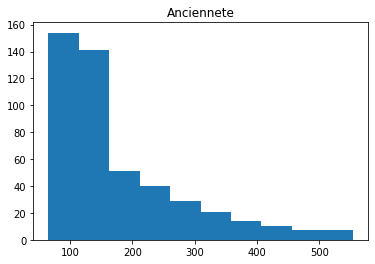

In [133]:
plt.hist(df['Anciennete'],density=False,bins=10)
plt.title('Anciennete')

Text(0.5, 1.0, 'Cadre')

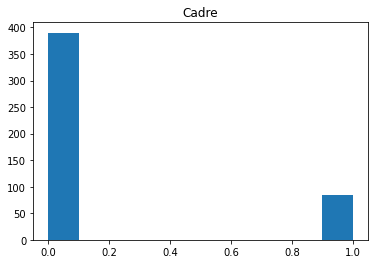

In [134]:
plt.hist(df['Cadre'],density=False,bins=10)
plt.title('Cadre')

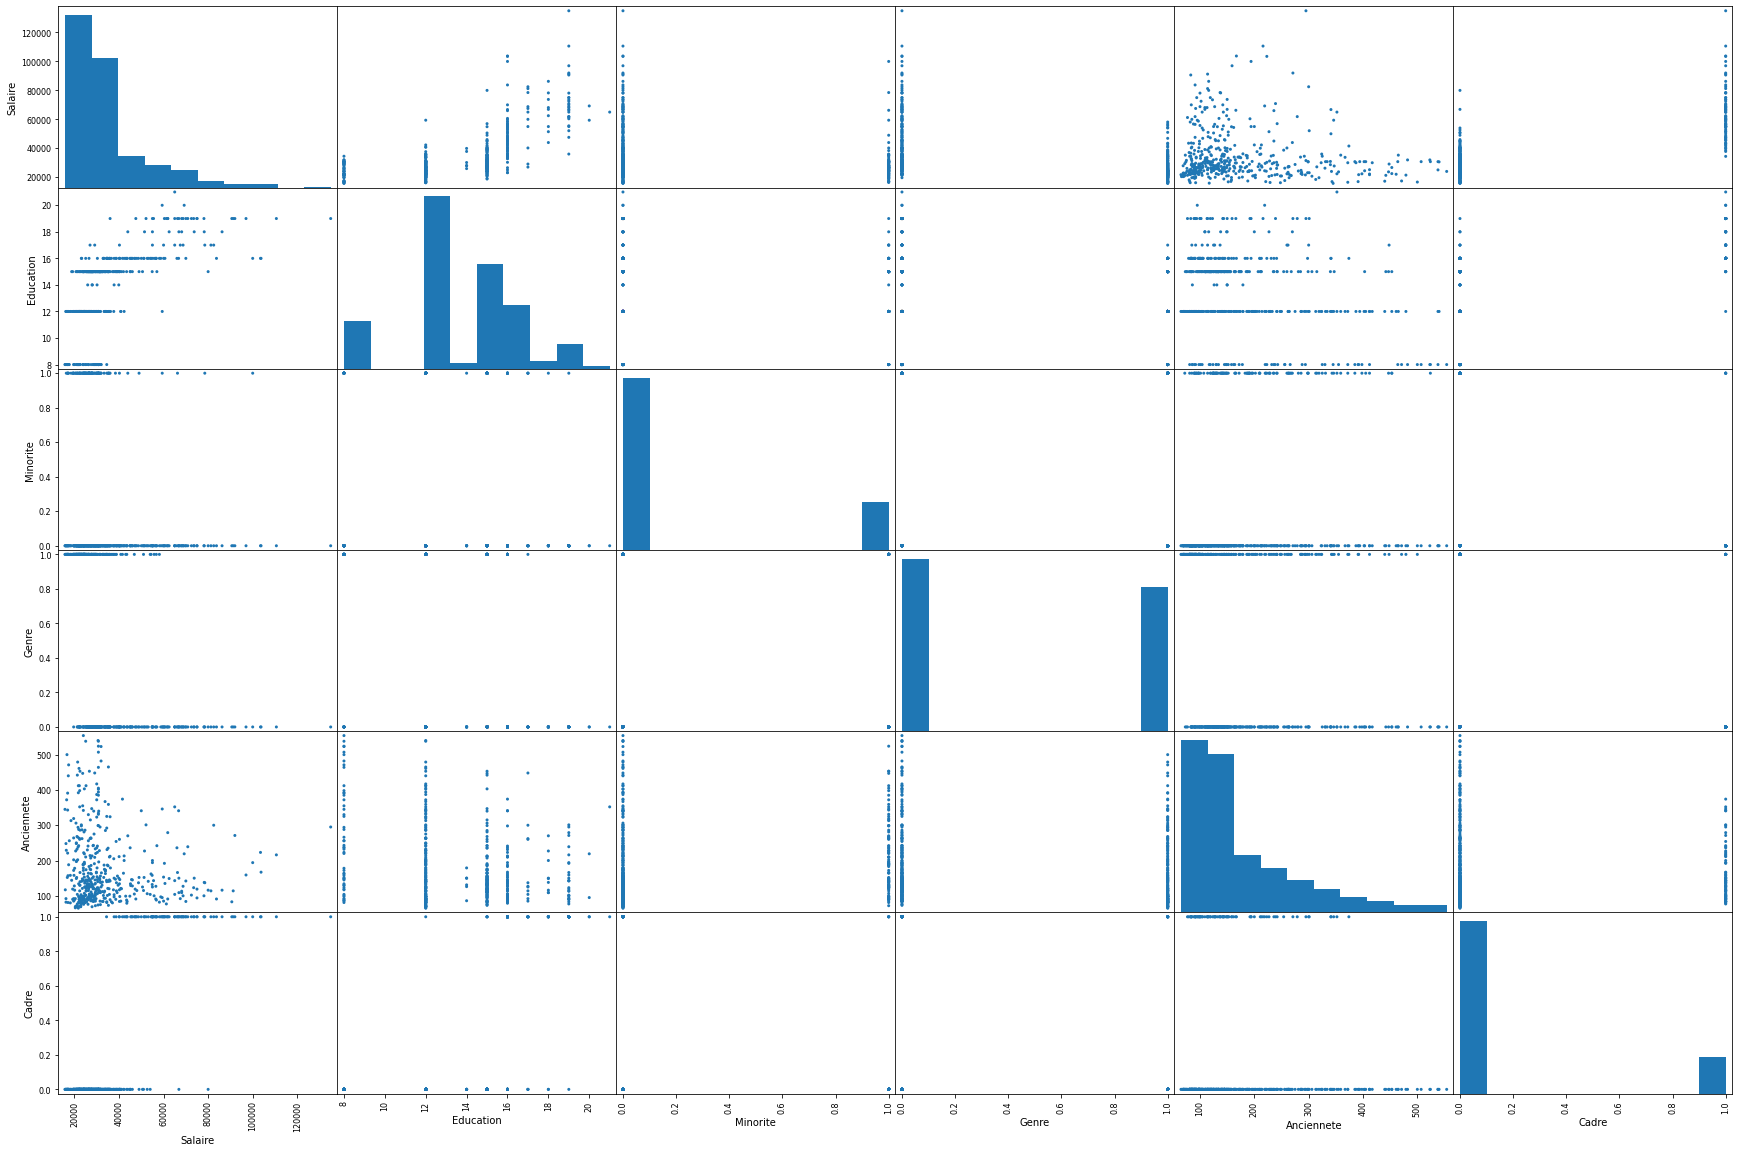

In [135]:
pd.plotting.scatter_matrix(df, alpha = 1, figsize = (30, 20))
plt.show()

c/ Box **plot**

In [136]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


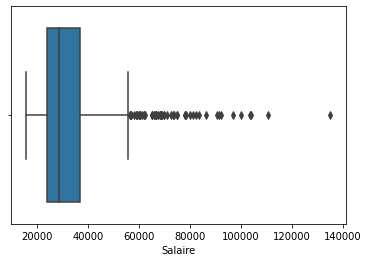

In [137]:
sns.boxplot(df['Salaire'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


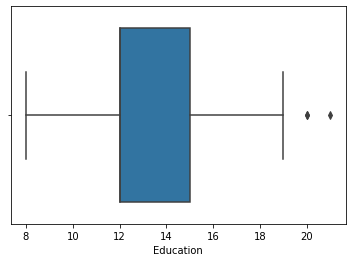

In [138]:
sns.boxplot(df['Education'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


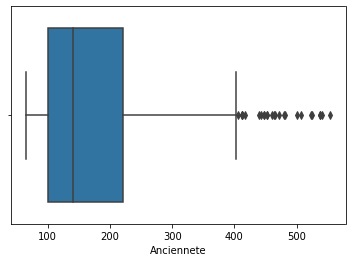

In [139]:
 sns.boxplot(df['Anciennete'])

### 2/ Etude de dépendance linéaire entre les variables de la table 

Text(0, 0.5, 'Pourcentage de salariés')

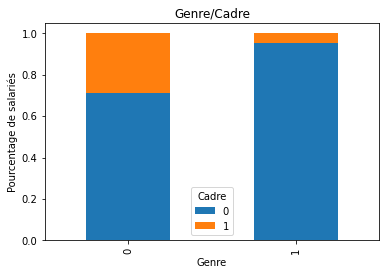

In [140]:
table1=pd.crosstab(df.Genre,df.Cadre)
table1.div(table1.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title("Genre/Cadre")
plt.xlabel("Genre")
plt.ylabel("Pourcentage de salariés")

Text(0, 0.5, 'Pourcentage d employé')

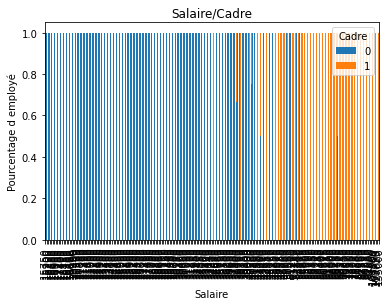

In [141]:
table2=pd.crosstab(df.Salaire,df.Cadre)
table2.div(table2.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title("Salaire/Cadre")
plt.xlabel("Salaire")
plt.ylabel("Pourcentage d employé")

Text(0, 0.5, 'Pourcentage d employé')

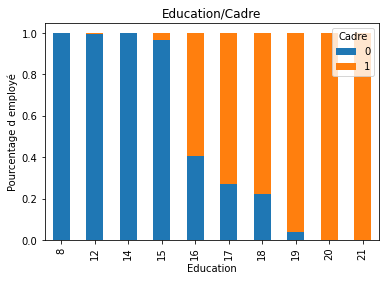

In [142]:
table3=pd.crosstab(df.Education,df.Cadre)
table3.div(table3.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title("Education/Cadre")
plt.xlabel("Education")
plt.ylabel("Pourcentage d employé")

Text(0, 0.5, 'Pourcentage d employé')

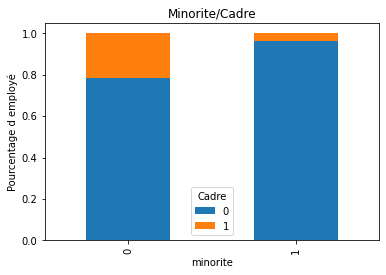

In [143]:
table4=pd.crosstab(df.Minorite,df.Cadre)
table4.div(table4.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title("Minorite/Cadre")
plt.xlabel("minorite")
plt.ylabel("Pourcentage d employé")

Text(0, 0.5, 'Pourcentage d employé')

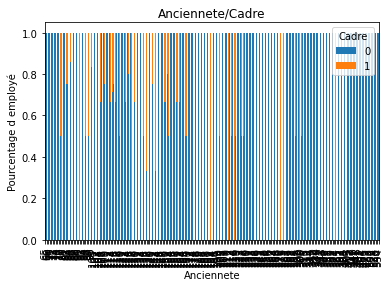

In [144]:
table5=pd.crosstab(df.Anciennete,df.Cadre)
table5.div(table5.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title("Anciennete/Cadre")
plt.xlabel("Anciennete")
plt.ylabel("Pourcentage d employé")

*Matrice de corrélation*



In [145]:
matrice_correlation=df.corr()
display(matrice_correlation)

,Salaire,Education,Minorite,Genre,Anciennete,Cadre
Salaire,1.000000,0.660559,-0.177337,-0.449923,-0.088942,0.804205
Education,0.660559,1.000000,-0.132889,-0.355986,-0.246586,0.605272
Minorite,-0.177337,-0.132889,1.000000,-0.075668,0.148779,-0.192649
Genre,-0.449923,-0.355986,-0.075668,1.000000,-0.170415,-0.313708
Anciennete,-0.088942,-0.246586,0.148779,-0.170415,1.000000,-0.080438
Cadre,0.804205,0.605272,-0.192649,-0.313708,-0.080438,1.000000


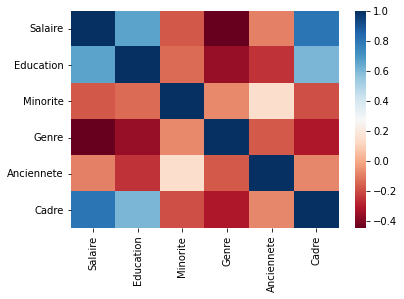

In [146]:
sns.heatmap(matrice_correlation,xticklabels=matrice_correlation.columns,yticklabels=matrice_correlation.columns,cmap="RdBu")

### 3/ Réalisation d'un modéle de régression Logistique :

a/ Statsmodels

In [147]:
import statsmodels.api as sm

*->Identifier la variable cible*

In [148]:
Y=df.Cadre

In [149]:
X=df.drop('Cadre',axis=1)

In [150]:
X=X.drop('Anciennete',axis=1)
#Suppression de la variable Anciennete car sa corrélation avec le variable cible est trés faible

In [151]:
X=sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [152]:
regLog=sm.Logit(Y,X).fit()

Optimization terminated successfully.
         Current function value: 0.105719
         Iterations 10


In [153]:
print(regLog.summary())

                           Logit Regression Results                           
Dep. Variable:                  Cadre   No. Observations:                  474
Model:                          Logit   Df Residuals:                      469
Method:                           MLE   Df Model:                            4
Date:                Sat, 12 Mar 2022   Pseudo R-squ.:                  0.7737
Time:                        16:36:58   Log-Likelihood:                -50.111
converged:                       True   LL-Null:                       -221.43
Covariance Type:            nonrobust   LLR p-value:                 6.838e-73
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.1890      3.512     -5.463      0.000     -26.073     -12.305
Salaire        0.0002   3.27e-05      5.834      0.000       0.000       0.000
Education      0.6492      0.230      2.823      0.0

In [154]:
devianceModele=(-2)*regLog.llf
print("deviance de modéle est : ",devianceModele)

deviance de modéle est :  100.22187147710466


In [155]:
#D'apres la p value, on supprime la variable independante Genre, car notre seuil est 5%
X=X.drop('Genre',axis=1)

In [156]:
regLog1=sm.Logit(Y,X).fit()


Optimization terminated successfully.
         Current function value: 0.105995
         Iterations 10


In [157]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [158]:
print(regLog1.summary())

                           Logit Regression Results                           
Dep. Variable:                  Cadre   No. Observations:                  474
Model:                          Logit   Df Residuals:                      470
Method:                           MLE   Df Model:                            3
Date:                Sat, 12 Mar 2022   Pseudo R-squ.:                  0.7731
Time:                        16:37:21   Log-Likelihood:                -50.242
converged:                       True   LL-Null:                       -221.43
Covariance Type:            nonrobust   LLR p-value:                 6.698e-74
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.0168      3.532     -5.385      0.000     -25.939     -12.095
Salaire        0.0002   3.17e-05      5.915      0.000       0.000       0.000
Education      0.6542      0.233      2.803      0.0

*->on remarque que maximum de vraisemblance est égale à -50.242, presque n'a pas changé, donc c'est mieux d'éliminer la variable genre*

In [159]:
devianceModele1=(-2)*regLog1.llf
print("deviance de modéle est : ",devianceModele1) 

deviance de modéle est :  100.48372552445244


In [160]:
y_pred=regLog1.predict(X)

In [161]:
Y_pred=list(map(round,y_pred))
print(Y_pred)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 

In [162]:
print(regLog1.pred_table())

[[383.   7.]
 [ 13.  71.]]


In [163]:
print("test accuracy : ",accuracy_score(Y,Y_pred))

test accuracy :  0.9578059071729957


b/ Sklearn

In [164]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [174]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.35)

In [175]:
model=LogisticRegression()

In [176]:
r=model.fit(X_train,Y_train)

In [177]:
r.score(X_test,Y_test)

0.9578313253012049

*les coeffcients d'estimations*

In [178]:
print(pd.DataFrame({"var":X_train.columns,"coef":model.coef_[0]})) 

         var      coef
0      const -3.121280
1    Salaire  0.000175
2  Education -0.133632
3   Minorite -2.255296


In [179]:
from sklearn.metrics import mean_tweedie_deviance

In [180]:
#Normalisation des donnés
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [181]:
classifier = LogisticRegression(random_state = 0, solver='liblinear')
re=classifier.fit(X_train, Y_train)

In [182]:
re.score(X_test,Y_test)

0.9759036144578314

In [183]:
y_pred=classifier.predict(X_test)

In [184]:
y_pred1 = classifier.predict(X_test)
print(y_pred1)

[0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [185]:
mean_tweedie_deviance(Y_test, y_pred1)

0.024096385542168676

*->Aussi le déviance moyenne a diminué*

In [186]:
cm=confusion_matrix(Y_test,y_pred1)

In [187]:
display(cm)

array([[136,   2],
       [  2,  26]])

*La courbe ROC*

In [188]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred1, Y_test)
roc_auc = auc(fpr, tpr)

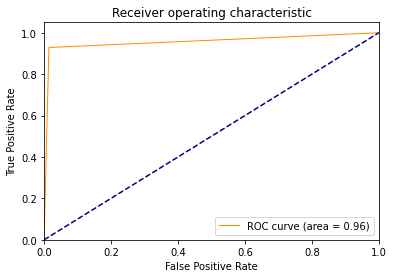

In [189]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### **La prédiction:**

In [190]:
X.head()

,const,Salaire,Education,Minorite
0,1.0,57000,15,0
1,1.0,40200,16,0
2,1.0,21450,12,0
3,1.0,21900,8,0
4,1.0,45000,15,0


In [191]:
print(classifier.predict([[1,45000,15,0]]))

[1]


->donc l'employé homme dont le salaire est 40000 $/an ayant travaill  300 mois pendant sa carrière professionnelle tout en faisant 15 ans d’études et qui appartient à une minorité sera un **cadre**